# First Analysis - RJ Election 2022
Apresenta a primeira an√°lise dos dados com uma exibi√ß√£o base em python.

Exibe o tipo dos dados coletados em tabelas e permite uma observa√ß√£o primitiva de sua organiza√ß√£o.

In [1]:
# Import de bibliotecas
try:
  import matplotlib
  print('Matplotlib is already installed!')
  print(f'Matplotlib version: {matplotlib.__version__}\n')
except ImportError:
  print('Installing Matplotlib...')
  !pip install matplotlib

try:
  import numpy
  print('Numpy is already installed!')
  print(f'Numpy version: {numpy.__version__}\n')
except ImportError:
  print('Installing Numpy...')
  !pip install numpy

try:
  import pandas
  print('Pandas is already installed!')
  print(f'Pandas version: {pandas.__version__}\n')
except ImportError:
  print('Installing Pandas...')
  !pip install pandas

try:
    import geopandas as gpd
    print('GeoPandas is already installed!')
    print(f'GeoPandas version: {gpd.__version__}\n')
except ImportError:
    print('Installing GeoPandas...')
    !pip install geopandas
    import geopandas as gpd
    print(f'GeoPandas version: {gpd.__version__}\n')

try:
  import pyarrow as pa
  print('PyArrow is already installed!')
  print(f'PyArrow version: {pa.__version__}\n')
except ImportError:
  print('Installing PyArrow...')
  !pip install pyarrow

try:
  import os
  print('OS is already installed!')
except ImportError:
  print('Installing OS...')
  !pip install os


Matplotlib is already installed!
Matplotlib version: 3.9.0

Numpy is already installed!
Numpy version: 2.3.4

Pandas is already installed!
Pandas version: 2.3.3

GeoPandas is already installed!
GeoPandas version: 1.1.1

PyArrow is already installed!
PyArrow version: 16.1.0

OS is already installed!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa

import geopandas as gpd

In [4]:
# Caminho dos dados

path_alfabetizacao_csv = "./DADOS/Alfabetizacao/Agregados_por_municipios_alfabetizacao_BR.csv"
path_seguranca_csv = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
path_votos_TSE_csv = "./DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv"
path_malha_zip = "./DADOS/MalhaGeometrica/rj_municipios.zip"


# Leitura dos arquivos para dataframes -> usando pandas

# L√™ o arquivo CSV e carrega em um DataFrame
df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv,  encoding='latin1', sep=';')
df_seguranca = pd.read_csv(path_seguranca_csv,  encoding='latin1', sep=';')

# df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep='')
df_votos = pd.read_csv(path_votos_TSE_csv, encoding='latin1', sep=';')

In [5]:
# Verifica√ß√£o das primeiras linhas dos dados

# Exibe as primeiras 5 linhas do DataFrame
print("Data frame de alfabetiza√ß√£o: \n")
print(df_alfabetizacao.head())

print("Data frame de seguran√ßa: \n")
print(df_seguranca.head())
# print(df_votos.head())

Data frame de alfabetiza√ß√£o: 

    CD_MUN                 NM_MUN  V00644  V00645  V00646  V00647  V00648  \
0  1100015  Alta Floresta D'Oeste    1644    1514    1557    1643    1511   
1  1100023              Ariquemes    7666    8193    8053    7656    7741   
2  1100031                 Cabixi     373     246     306     373     402   
3  1100049                 Cacoal    6299    7292    7282    7029    6858   
4  1100056             Cerejeiras    1142    1044    1275    1285    1222   

   V00649  V00650  V00651  ...  V00996  V00997  V00998  V00999  V01000  \
0    1576    1541    1352  ...     109     226     119      40      73   
1    7404    6582    5774  ...     484    1106     506     328     591   
2     425     338     399  ...       3      29      21       3       9   
3    6765    5774    5377  ...     489    1181     401     279     430   
4    1142    1083     967  ...     101     172      84      36      90   

   V01001  V01002  V01003  V01004  V01005  
0      51     1

In [6]:
rj = gpd.read_file('./DADOS/MalhaGeometrica/rj_municipios/33MUE250GC_SIR.shp')
rj.head()


ID CD_GEOCODM          NM_MUNICIP  \
0  1468    3300100      ANGRA DOS REIS   
1  1469    3300159             APERIB√â   
2  1470    3300209            ARARUAMA   
3  1471    3300225               AREAL   
4  1472    3300233  ARMA√á√ÉO DOS B√öZIOS   

                                            geometry  
0  MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...  
1  POLYGON ((-42.0895 -21.62893, -42.08912 -21.62...  
2  POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...  
3  POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...  
4  MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...

<Axes: >

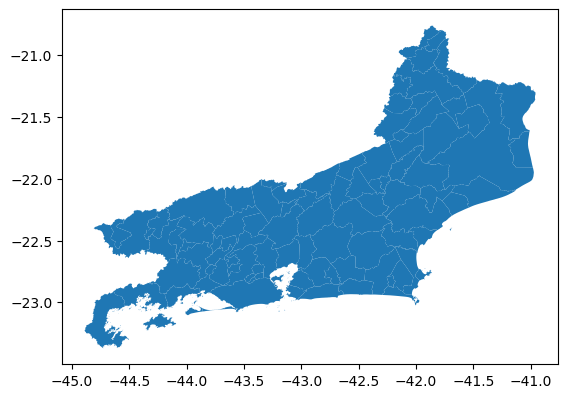

In [7]:
rj.plot()

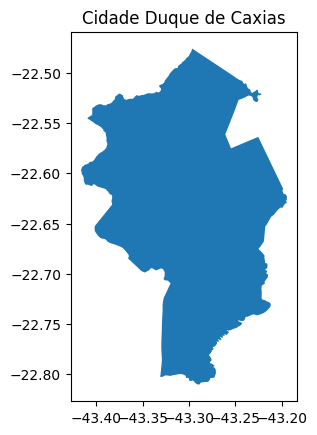

In [8]:
duque_de_caxias_city = rj[rj.NM_MUNICIP == 'DUQUE DE CAXIAS'].reset_index(drop=True)
ax2 = duque_de_caxias_city.plot()
ax2.set_title('Cidade Duque de Caxias');

In [10]:
# Solu√ß√£o: Adicionar encoding='latin-1'
df_raw = pd.read_csv(path_votos_TSE_csv, header=None, encoding='latin-1')

# O resto do seu c√≥digo de tratamento manual funcionar√° normalmente:
df_votos = df_raw[0].str.replace('"', '').str.split(';', expand=True)

df_votos.columns = df_votos.iloc[0]
df_votos = df_votos[1:] 

df_votos = df_votos.reset_index(drop=True)

# Agora os prints devem funcionar
print(df_votos.head())
print(df_votos.columns[:10])
print(df_votos.shape)

0  DT_GERACAO HH_GERACAO ANO_ELEICAO CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
1  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
2  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
3  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
4  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   

0 NR_TURNO CD_ELEICAO                      DS_ELEICAO  DT_ELEICAO  \
0        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
1        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
2        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
3        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
4        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   

0 TP_ABRANGENCIA  ... DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0              E  ...        

In [11]:
df_votos.head()

0  DT_GERACAO HH_GERACAO ANO_ELEICAO CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
1  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
2  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
3  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   
4  30/10/2025   03:30:41        2022               2  Elei√ß√£o Ordin√°ria   

0 NR_TURNO CD_ELEICAO                      DS_ELEICAO  DT_ELEICAO  \
0        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
1        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
2        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
3        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   
4        1        546  ELEI√á√ïES GERAIS ESTADUAIS 2022  02/10/2022   

0 TP_ABRANGENCIA  ... DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO     NM_COLIGACAO  \
0              E  ...                  #NULO#  190001683148  PARTIDO ISOLADO   
1              E  ...                  #NULO#  190001683148  PARTIDO ISOLADO   
2              E  ...                  #NULO#  190001683148  PARTIDO ISOLADO   
3              E  ...                  #NULO#  190001683148  PARTIDO ISOLADO   
4              E  ...                  #NULO#  190001683148  PARTIDO ISOLADO   

0 DS_COMPOSICAO_COLIGACAO ST_VOTO_EM_TRANSITO QT_VOTOS_NOMINAIS  \
0                    PRTB                   N                 0   
1                    PRTB                   N                 0   
2                    PRTB                   N                 0   
3                    PRTB                   N                 0   
4                    PRTB                   N                 0   

0 NM_TIPO_DESTINACAO_VOTOS QT_VOTOS_NOMINAIS_VALIDOS CD_SIT_TOT_TURNO  \
0                   V√°lido                         0                4   
1                   V√°lido                         0                4   
2                   V√°lido                         0                4   
3                   V√°lido                         0                4   
4                   V√°lido                         0                4   

0 DS_SIT_TOT_TURNO  
0       N√ÉO ELEITO  
1       N√ÉO ELEITO  
2       N√ÉO ELEITO  
3       N√ÉO ELEITO  
4       N√ÉO ELEITO  

[5 rows x 50 columns]

In [13]:
# Quantidade de municipios em cada dataframe (usando .unique)
print("Quantidade de munic√≠pios DF_Alfabetiza√ß√£o:", df_alfabetizacao['CD_MUN'].nunique())
print("Quantidade de munic√≠pios DF_Seguran√ßa:", df_seguranca['fmun_cod'].nunique())
print("Quantidade de munic√≠pios Malha Geom√©trica RJ:", rj['CD_GEOCODM'].nunique())
print("Quantidade de munic√≠pios DF_Votos_TSE:", df_votos['CD_MUNICIPIO'].nunique())

Quantidade de munic√≠pios DF_Alfabetiza√ß√£o: 5570
Quantidade de munic√≠pios DF_Seguran√ßa: 92
Quantidade de munic√≠pios Malha Geom√©trica RJ: 92
Quantidade de munic√≠pios DF_Votos_TSE: 92


In [14]:
# C√©lulas em branco
print("Quantidade de c√©lulas em branco DF_Alfabetiza√ß√£o:", df_alfabetizacao.isnull().sum().sum())
print("Quantidade de c√©lulas em branco DF_Seguran√ßa:", df_seguranca.isnull().sum().sum())
print("Quantidade de c√©lulas em branco Malha Geom√©trica RJ:", rj.isnull().sum().sum())
print("Quantidade de c√©lulas em branco DF_Votos_TSE:", df_votos.isnull().sum().sum())


Quantidade de c√©lulas em branco DF_Alfabetiza√ß√£o: 0
Quantidade de c√©lulas em branco DF_Seguran√ßa: 0
Quantidade de c√©lulas em branco Malha Geom√©trica RJ: 0
Quantidade de c√©lulas em branco DF_Votos_TSE: 0


In [15]:
# Dados duplicados
print("Quantidade de dados duplicados DF_Alfabetiza√ß√£o:", df_alfabetizacao.duplicated().sum())
print("Quantidade de dados duplicados DF_Seguran√ßa:", df_seguranca.duplicated().sum())
print("Quantidade de dados duplicados Malha Geom√©trica RJ:", rj.duplicated().sum())
print("Quantidade de dados duplicados DF_Votos_TSE:", df_votos.duplicated().sum())

Quantidade de dados duplicados DF_Alfabetiza√ß√£o: 0
Quantidade de dados duplicados DF_Seguran√ßa: 0
Quantidade de dados duplicados Malha Geom√©trica RJ: 0
Quantidade de dados duplicados DF_Votos_TSE: 0


In [16]:
# Filtro das colunas necess√°rias de alfabetiza√ß√£o

path_alfabetizacao_csv_filtrado = "./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv"

if not os.path.exists(path_alfabetizacao_csv_filtrado):
    # Le CSV novamente por garantia
    df_alfabetizacao = pd.read_csv(path_alfabetizacao_csv, sep=';', encoding='latin1')

    df_alfabetizacao.columns = df_alfabetizacao.columns.str.strip()
    print("Colunas do CSV:", df_alfabetizacao.columns.tolist())

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_base_existentes = [c for c in colunas_base if c in df_alfabetizacao.columns]

    if len(colunas_base_existentes) < len(colunas_base):
        raise ValueError(f"Algumas colunas base n√£o existem no CSV: {colunas_base}.\nColunas existentes: {df_alfabetizacao.columns.tolist()}")

    # Filtrar apenas as colunas V00748 a V00760 presentes no CSV
    colunas_alfabetizacao = []
    for i in range(48, 61):  # de 48 at√© 60
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)


    colunas_desejadas = colunas_base_existentes + colunas_alfabetizacao

    df_filtrado = df_alfabetizacao[colunas_desejadas]

    # Salvar CSV filtrado pronto
    df_filtrado.to_csv(path_alfabetizacao_csv_filtrado, sep=';', index=False, quoting=1)

    print(f"‚úÖ CSV filtrado criado com sucesso: {path_alfabetizacao_csv_filtrado}")
else:
    print(f"üìå Arquivo j√° existe: {path_alfabetizacao_csv_filtrado}")

# Filtro das linhas necess√°rias de alfabetiza√ß√£o - SOMENTE RJ
path_tse = "./DADOS/TSE/municipios_brasileiros_tse.csv"
path_final = "./DADOS/Alfabetizacao/por_municipio_RJ.csv"
if not os.path.exists(path_final):

    df_alf = pd.read_csv(path_alfabetizacao_csv_filtrado, sep=';', encoding='latin1')
    df_tse = pd.read_csv(path_tse, sep=',', encoding='latin1')

    # Normaliza√ß√£o
    df_alf.columns = df_alf.columns.str.strip()
    df_tse.columns = df_tse.columns.str.strip()

    # Converter COD_IBGE para string e padronizar com zeros √† esquerda
    df_alf["CD_MUN"] = df_alf["CD_MUN"].astype(str).str.zfill(7)
    df_tse["codigo_ibge"] = df_tse["codigo_ibge"].astype(str).str.zfill(7)

    # Filtrar apenas munic√≠pios do RJ usando merge
    df_merged = df_alf.merge(df_tse[["uf", "codigo_ibge"]],
                              left_on="CD_MUN", right_on="codigo_ibge",
                              how="inner")

    df_rj = df_merged[df_merged["uf"] == "RJ"]

    colunas_base = ["CD_MUN", "NM_MUN"]
    colunas_alfabetizacao = []
    for i in range(48, 61):
        col = f"V007{i}"
        if col in df_alfabetizacao.columns:
            colunas_alfabetizacao.append(col)
    colunas_desejadas = colunas_base + colunas_alfabetizacao

    df_rj_final = df_rj[colunas_desejadas]

    df_rj_final.to_csv(path_final, sep=';', index=False, quoting=1)

    print(f"‚úÖ Arquivo filtrado do RJ criado com sucesso: {path_final}")
else:
    print(f"üìå Arquivo j√° existe: {path_final}")



üìå Arquivo j√° existe: ./DADOS/Alfabetizacao/por_municipio_filtrado_categorias_totais.csv
üìå Arquivo j√° existe: ./DADOS/Alfabetizacao/por_municipio_RJ.csv


In [17]:
# Filtro dos dados de seguran√ßa - por colunas
path_seg_ano = "./DADOS/Seguranca/seguranca_municipios_ano.csv"

if not os.path.exists(path_seg_ano):
    path_seg = "./DADOS/Seguranca/BaseMunicipioMensal.csv"
    df_seg = pd.read_csv(path_seg, sep=';', encoding='latin1', engine='python')

    df_seg.columns = df_seg.columns.str.strip()

    colunas_base = ["fmun_cod", "fmun", "ano"]
    colunas_totais = ["total_roubos", "total_furtos", "registro_ocorrencias"]

    # Verificar se todas as colunas existem
    for col in colunas_base + colunas_totais:
        if col not in df_seg.columns:
            raise KeyError(f"Coluna '{col}' n√£o encontrada. Colunas dispon√≠veis: {df_seg.columns.tolist()}")

    df_seg = df_seg[colunas_base + colunas_totais]

    # Agrupar por munic√≠pio e ano, somando os valores
    df_agrupado = df_seg.groupby(["fmun_cod", "fmun", "ano"], as_index=False).sum()

    df_agrupado.to_csv(path_seg_ano, sep=';', index=False, quoting=1)
    print(f"‚úÖ CSV de seguran√ßa anual criado: {path_seg_ano}")

else:
    print(f"üìå Arquivo j√° existe, n√£o ser√° recriado: {path_seg_ano}")


# Filtro dos dados de seguran√ßa - por linhas, mantendo apenas o ano de 2021 como interesse
path_seg_2021 = "./DADOS/Seguranca/seguranca_municipios_2021.csv"

if not os.path.exists(path_seg_2021):
    df_ano = pd.read_csv(path_seg_ano, sep=';', encoding='latin1', engine='python')

    # ---- Filtrar apenas o ano de 2021 ----
    df_2021 = df_ano[df_ano["ano"] == 2021].copy()

    # ---- Salvar CSV filtrado ----
    df_2021.to_csv(path_seg_2021, sep=';', index=False, quoting=1)
    print(f"‚úÖ CSV de seguran√ßa apenas 2021 criado: {path_seg_2021}")

else:
    print(f"üìå Arquivo j√° existe, n√£o ser√° recriado: {path_seg_2021}")

üìå Arquivo j√° existe, n√£o ser√° recriado: ./DADOS/Seguranca/seguranca_municipios_ano.csv
üìå Arquivo j√° existe, n√£o ser√° recriado: ./DADOS/Seguranca/seguranca_municipios_2021.csv


In [ ]:
# Filtro dos dados de votos
path_votos_TSE_csv = "./DADOS/TSE/votacao_candidato_munzona_2022_RJ.csv" # Arquivo de origem
path_votos_filtrados = "./DADOS/TSE/votos_filtrados.csv" # Arquivo de destino

if not os.path.exists(path_votos_filtrados):
    df_urnas = pd.read_csv(path_votos_TSE_csv, sep=';', encoding='latin1', engine='python')

    df_urnas.columns = df_urnas.columns.str.strip()

    colunas_votos = [
        'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO',
        'CD_MUNICIPIO', 'NM_MUNICIPIO',
        'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
        'NM_TIPO_DESTINACAO_VOTOS','QT_VOTOS_NOMINAIS_VALIDOS', 'DS_SIT_TOT_TURNO'
    ]   

    # Verificar se todas as colunas existem
    for col in colunas_votos:
        if col not in df_urnas.columns:
            raise KeyError(f"Coluna '{col}' n√£o encontrada. Colunas dispon√≠veis: {df_urnas.columns.tolist()}")

    df_urnas = df_urnas[colunas_votos].copy() # Adicionado .copy() por seguran√ßa

    # Salvar no caminho de destino (path_votos_filtrados)
    df_urnas.to_csv(path_votos_filtrados, sep=';', index=False, quoting=1)
    
    # Imprimir o caminho de destino (path_votos_filtrados)
    print(f"‚úÖ CSV de votos filtrados criado: {path_votos_filtrados}")

else:
    print(f"üìå Arquivo j√° existe, n√£o ser√° recriado: {path_votos_filtrados}")



df_urnas.head()

‚úÖ CSV de votos filtrados criado: ./DADOS/TSE/votos_filtrados.csv


CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  CD_ELEICAO  \
0                2  Elei√ß√£o Ordin√°ria         546   
1                2  Elei√ß√£o Ordin√°ria         546   
2                2  Elei√ß√£o Ordin√°ria         546   
3                2  Elei√ß√£o Ordin√°ria         546   
4                2  Elei√ß√£o Ordin√°ria         546   

                       DS_ELEICAO  CD_MUNICIPIO          NM_MUNICIPIO  \
0  ELEI√á√ïES GERAIS ESTADUAIS 2022         58912  SANTA MARIA MADALENA   
1  ELEI√á√ïES GERAIS ESTADUAIS 2022         58912  SANTA MARIA MADALENA   
2  ELEI√á√ïES GERAIS ESTADUAIS 2022         58912  SANTA MARIA MADALENA   
3  ELEI√á√ïES GERAIS ESTADUAIS 2022         58912  SANTA MARIA MADALENA   
4  ELEI√á√ïES GERAIS ESTADUAIS 2022         58912  SANTA MARIA MADALENA   

   NR_CANDIDATO                      NM_CANDIDATO  NR_PARTIDO SG_PARTIDO  \
0         28193                   ILSON DE ARAUJO          28       PRTB   
1         28100   MARCELO TADEU AZEVEDO RODRIGUES          28       PRTB   
2         28033            JO√ÉO LEOMI SILVA NUNES          28       PRTB   
3         28467  ELIETE MOREIRA DE SOUZA DA COSTA          28       PRTB   
4         28660         TATIANE MENEDES  TEIXEIRA          28       PRTB   

                                 NM_PARTIDO ST_VOTO_EM_TRANSITO  \
0  Partido Renovador Trabalhista Brasileiro                   N   
1  Partido Renovador Trabalhista Brasileiro                   N   
2  Partido Renovador Trabalhista Brasileiro                   N   
3  Partido Renovador Trabalhista Brasileiro                   N   
4  Partido Renovador Trabalhista Brasileiro                   N   

   QT_VOTOS_NOMINAIS NM_TIPO_DESTINACAO_VOTOS  QT_VOTOS_NOMINAIS_VALIDOS  \
0                  0                   V√°lido                          0   
1                  0                   V√°lido                          0   
2                  0                   V√°lido                          0   
3                  0                   V√°lido                          0   
4                  0                   V√°lido                          0   

   CD_SIT_TOT_TURNO DS_SIT_TOT_TURNO  
0                 4       N√ÉO ELEITO  
1                 4       N√ÉO ELEITO  
2                 4       N√ÉO ELEITO  
3                 4       N√ÉO ELEITO  
4                 4       N√ÉO ELEITO

In [19]:
# Resumo das modifica√ß√µes - adicionar tamb√©m no docs!

# Plot de informa√ß√µes estat√≠sticas

In [20]:
# Apresentar imagem do OMT-G 